Name: Kara

Labpartner(s): Adam

In [2]:
#import statements go here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Class 7.2

Note I am adding my pronouns (she/her) to my zoom name in solidarity with my LGBTQ+ students and colleagues and to create a more comfortable working environment for all of us. For more information on this practice, see the National Science Foundation (NSF) sponsored program Ulearning Racism in Geoscience (URGE, https://urgeoscience.org/, @Urgeoscience) session on Why Pronouns? https://youtu.be/BNIHQEAQhW4.

More plotting today, ocean modeling style

# Warmups 7.2

**W.1** Do the **exercises** in 1.4.1.5 Indexing and Slicing in the scipy lecture notes. http://scipy-lectures.org/intro/numpy/array_object.html#id2

In [2]:
np.linspace(0,10,6)

array([ 0.,  2.,  4.,  6.,  8., 10.])

In [3]:
np.linspace(11,1,6)

array([11.,  9.,  7.,  5.,  3.,  1.])

In [4]:
np.arange(6)+np.arange(0,51,10)[:, np.newaxis]

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [5]:
c = np.ones((4,4))

In [6]:
c[2,3] = 2
c[3,1] = 6
c

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 2.],
       [1., 6., 1., 1.]])

In [7]:
d = np.zeros((6,5))
d

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [8]:
d[1,0]= 2
d[2,1]= 3
d[3,2]= 4
d[4,3]= 5
d[5,4]= 6
d

array([[0., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0.],
       [0., 3., 0., 0., 0.],
       [0., 0., 4., 0., 0.],
       [0., 0., 0., 5., 0.],
       [0., 0., 0., 0., 6.]])

In [9]:
np.tile?

Signature: np.tile(A, reps)
Docstring:
Construct an array by repeating A the number of times given by reps.

If `reps` has length ``d``, the result will have dimension of
``max(d, A.ndim)``.

If ``A.ndim < d``, `A` is promoted to be d-dimensional by prepending new
axes. So a shape (3,) array is promoted to (1, 3) for 2-D replication,
or shape (1, 1, 3) for 3-D replication. If this is not the desired
behavior, promote `A` to d-dimensions manually before calling this
function.

If ``A.ndim > d``, `reps` is promoted to `A`.ndim by pre-pending 1's to it.
Thus for an `A` of shape (2, 3, 4, 5), a `reps` of (2, 2) is treated as
(1, 1, 2, 2).

Note : Although tile may be used for broadcasting, it is strongly
recommended to use numpy's broadcasting operations and functions.

Parameters
----------
A : array_like
    The input array.
reps : array_like
    The number of repetitions of `A` along each axis.

Returns
-------
c : ndarray
    The tiled output array.

See Also
--------
repeat : Repeat e

In [10]:
a = np.array([[4,3], [2,1]])

In [11]:
np.tile(a, (2,3))

array([[4, 3, 4, 3, 4, 3],
       [2, 1, 2, 1, 2, 1],
       [4, 3, 4, 3, 4, 3],
       [2, 1, 2, 1, 2, 1]])

# Lecture 7.2

### Agenda:

- Questions
- xarray package and plotting netcdf files


### Questions

### Loading and plotting netcdf files using xarray

Most modeling data output is in the form of netcdf files, as they can store more data (in binary) using less memory. Netcdf files are great because they tell you all about what is in the file (the variables and their units) with their metadata, which is kind of like the docstring we made for our function. There are a number of command line (unix-based) utilities for dealing with netcdf files, which I am not planning to cover in this course (though I use these all the time). Hit me up if you want some tutorials on this, or if enough of you are keen I will put some unix tutorials in the schedule.

xarray is a relatively new python package that does analysis and plotting of netcdf files. This is actively being developed by folks like the pangeo consortium (https://pangeo.io), which is creating a number of python utilities for big data geoscience, like dealing with massive amounts of climate model output. There are other packages that can be used for parsing netcdf files, but they are cumbersome and clunky. Trust me, xarray is the best thing since sliced bread for big data geoscience. 

Let's grab some data and start playing with it. We are going to use the HYCOM Gulf of Mexico Analysis output, which is basically weather prediction for our local ocean made by the Navy, freely available. https://www.hycom.org.

In [12]:
import xarray as xr

We want the HYCOM GoM Analysis product: https://www.hycom.org/data/gomu0pt04/expt-90pt1m000

Which we can get using the opendap link (see http://xarray.pydata.org/en/stable/io.html)

In [13]:
# here I am going to grab the forcast they made for 2/22. 
# Note I had to add the http: in front of the opendap link

link = "http://tds.hycom.org/thredds/dodsC/GOMu0.04/expt_90.1m000/FMRC/runs/GOMu0.04_901m000_FMRC_RUN_2021-02-22T12:00:00Z"

In [14]:
hycom_data = xr.open_dataset(link, decode_times=False)

# honestly I don't know why you need the decode_times bit with open_dataset
# I just know it doesn't work most of the time if you leave it out (bonus token for anyone who figures it out!)

The result is an xarray dataset, which is similar to the pandas dataframes you have been using. It has dimensions, coordinates and variables. The first thing to do when you get a dataset is to figure out what is in it and explore it a bit. 

In [15]:
hycom_data

<xarray.Dataset>
Dimensions:      (depth: 40, lat: 346, lon: 541, time: 133, time_1: 1)
Coordinates:
  * depth        (depth) float64 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * lat          (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon          (lon) float64 -98.0 -97.96 -97.92 ... -76.48 -76.44 -76.4
  * time         (time) float64 0.0 1.0 2.0 3.0 4.0 ... 129.0 130.0 131.0 132.0
Dimensions without coordinates: time_1
Data variables:
    tau          (time_1) float64 ...
    time_offset  (time) float64 ...
    water_u      (time, depth, lat, lon) float32 ...
    water_v      (time, depth, lat, lon) float32 ...
    water_temp   (time, depth, lat, lon) float32 ...
    salinity     (time, depth, lat, lon) float32 ...
    surf_el      (time, lat, lon) float32 ...
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    history:                   archv2ncdf3z ;\nFMRC Run 2021-02-22T12:00:00Z ...
    field_type:                instantaneous
    Conventions:               CF-1.4, NAVO_netcdf_v1.1
    _CoordSysBuilder:          ucar.nc2.dataset.conv.CF1Convention
    cdm_data_type:             GRID
    featureType:               GRID
    location:                  Proto fmrc:GOMu0.04_901m000_FMRC

In [16]:
# what is the time increment? Let's look at the metadata for the time coordinate

hycom_data.time

# looks like it's in hours and so this is hourly. 133 hours seems like a weird amount of time!

<xarray.DataArray 'time' (time: 133)>
array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,
        36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
        48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
        60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
        72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,
        84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
        96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106., 107.,
       108., 109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
       120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132.])
Coordinates:
  * time     (time) float64 0.0 1.0 2.0 3.0 4.0 ... 129.0 130.0 131.0 132.0
Attributes:
    long_name:            Forecast time for ForecastModelRunCollection
    standard_name:        time
    calendar:             proleptic_gregorian
    units:                hours since 2021-02-22 12:00:00.000 UTC
    _CoordinateAxisType:  Time

In [17]:
# what is the lat spacing and domain?

hycom_data.lat

# looks like it goes from 18.12 N to 31.92 N and the spacing is 0.04 degrees. 
# 1 degree is about 100 km, so that's 4 km 

<xarray.DataArray 'lat' (lat: 346)>
array([18.120001, 18.16    , 18.200001, ..., 31.84    , 31.879999, 31.92    ])
Coordinates:
  * lat      (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
Attributes:
    units:                degrees_north
    long_name:            Latitude
    standard_name:        latitude
    point_spacing:        even
    axis:                 Y
    NAVO_code:            1
    _CoordinateAxisType:  Lat

In [18]:
# what about lon?
hycom_data.lon

# 98 W to 76.4 W in approximately 0.04 steps again, so 4 km

<xarray.DataArray 'lon' (lon: 541)>
array([-98.      , -97.960022, -97.919983, ..., -76.47998 , -76.440002,
       -76.400024])
Coordinates:
  * lon      (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
Attributes:
    units:                degrees_east
    long_name:            Longitude
    standard_name:        longitude
    point_spacing:        even
    axis:                 X
    NAVO_code:            2
    _CoordinateAxisType:  Lon

### Basic plotting with xarray (not publication ready!)

In [19]:
hycom_data.surf_el # this is time by latxlon, let's plot the first time

<xarray.DataArray 'surf_el' (time: 133, lat: 346, lon: 541)>
[24895738 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon      (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
  * time     (time) float64 0.0 1.0 2.0 3.0 4.0 ... 129.0 130.0 131.0 132.0
Attributes:
    units:          m
    long_name:      Water Surface Elevation
    standard_name:  sea_surface_elevation
    NAVO_code:      32
    coordinates:    time_run time lat lon

Note that one of the amazing things about xarray, is that it actually does not go and get the data until you call for it, so this will take a minute to upload.

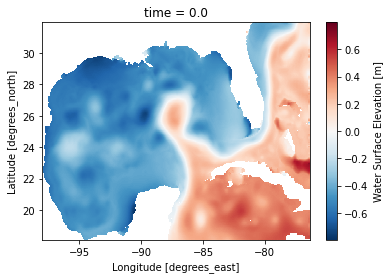

In [20]:
hycom_data.surf_el[0].plot()

Note that xarray, like pandas, uses matplotlib for plotting, and that it figured out to use the blue to red colormap based on the type of data. Pretty cool. 

Let's plot some temperature data and see how it compares. Since temperature data is given for the whole depth, we have to select a level.

(array([3.000000e+00, 3.000000e+00, 2.729020e+05, 3.069160e+05,
        1.732530e+05, 1.965190e+05, 2.560530e+05, 5.644090e+05,
        1.167647e+06, 8.347320e+05]),
 array([-5.3310013, -1.989701 ,  1.3515991,  4.692899 ,  8.0342   ,
        11.3755   , 14.7168   , 18.0581   , 21.3994   , 24.7407   ,
        28.082    ], dtype=float32),
 <a list of 10 Patch objects>)

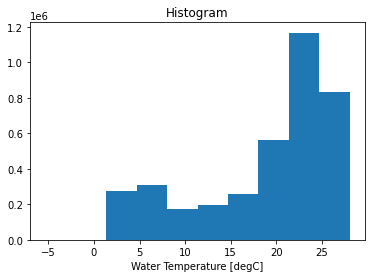

In [21]:
hycom_data.water_temp[0].plot()

Those plots are really small. I like to change the default matplotlib preferences to make my plots bigger.

In [22]:
# change all the defaults (usually I stick this up with the import statements)

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8.0, 5.0]
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['savefig.dpi'] = 500

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth']= 2.0

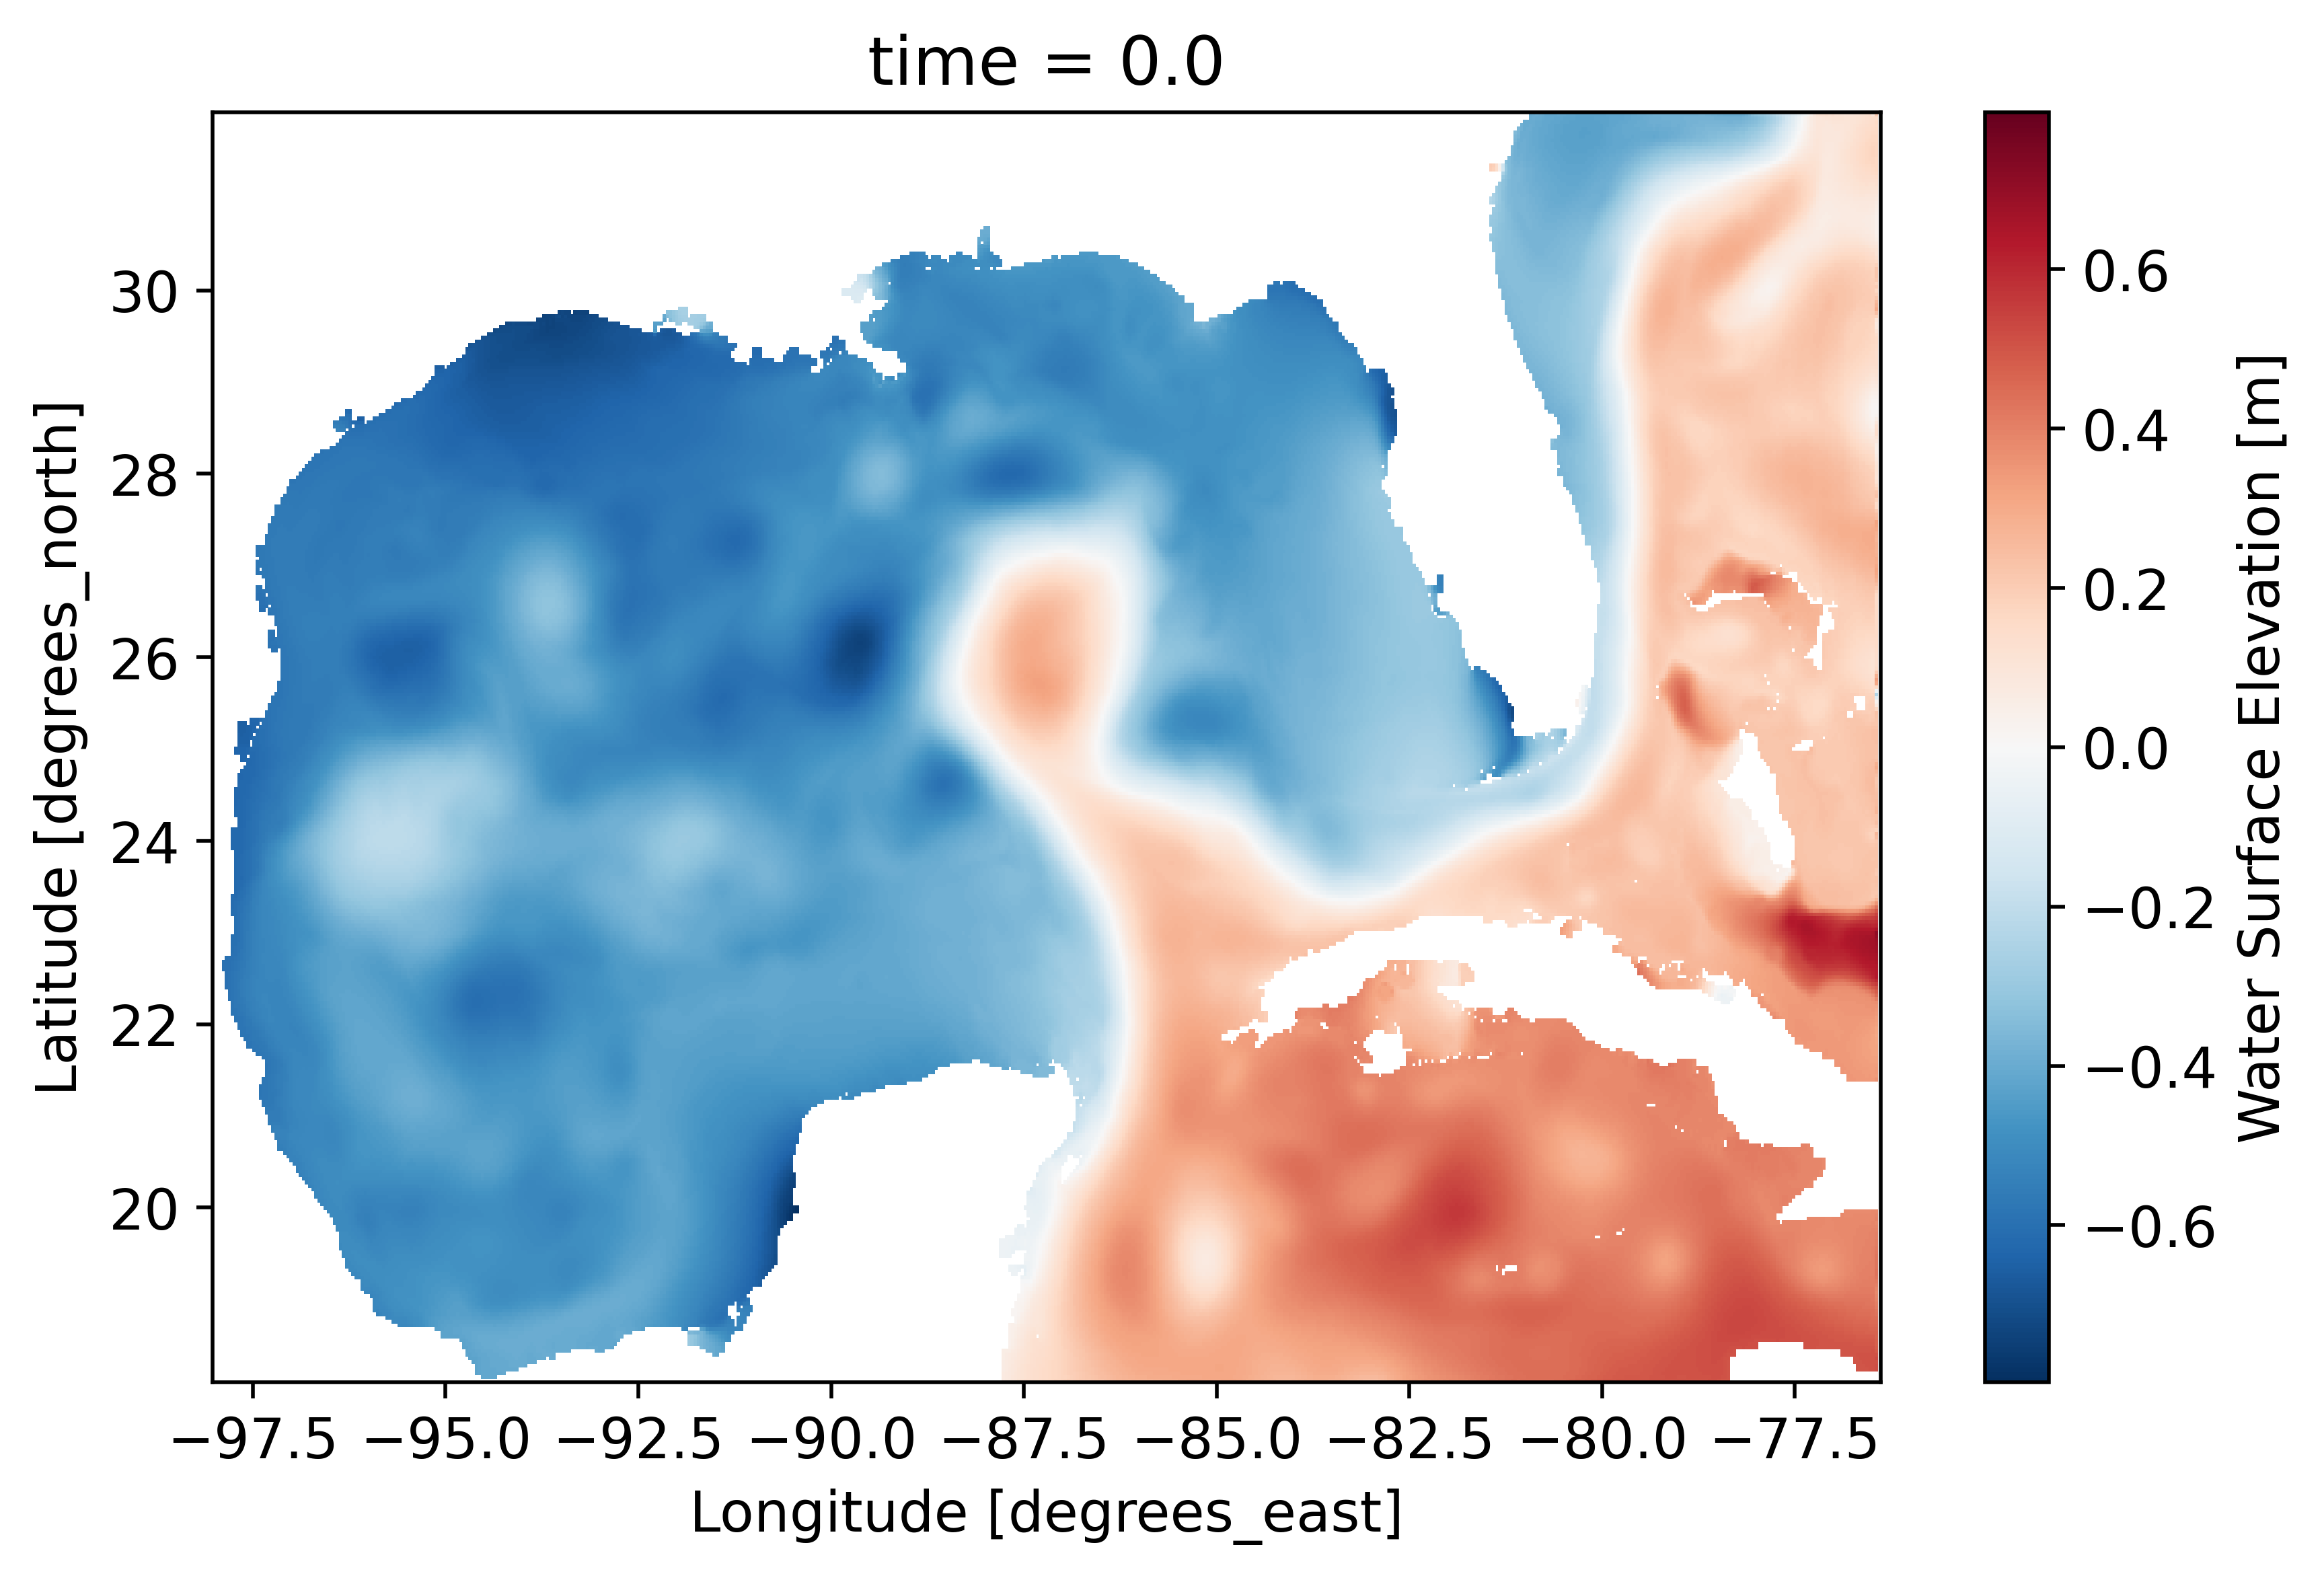

In [23]:
# now it's big and pretty.

hycom_data.surf_el[0].plot()

Note if you know you are going to plot the same bit of data over and over again to fiddle with the plot, you can download the data you need and save it in an array to make the proccess faster.

In [24]:
SSH_0 = hycom_data.surf_el[0]

In [25]:
type(SSH_0)

xarray.core.dataarray.DataArray

In [26]:
SSH_0 # note it saves all the coordinates I need.

<xarray.DataArray 'surf_el' (lat: 346, lon: 541)>
[187186 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon      (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
    time     float64 0.0
Attributes:
    units:          m
    long_name:      Water Surface Elevation
    standard_name:  sea_surface_elevation
    NAVO_code:      32
    coordinates:    time_run time lat lon

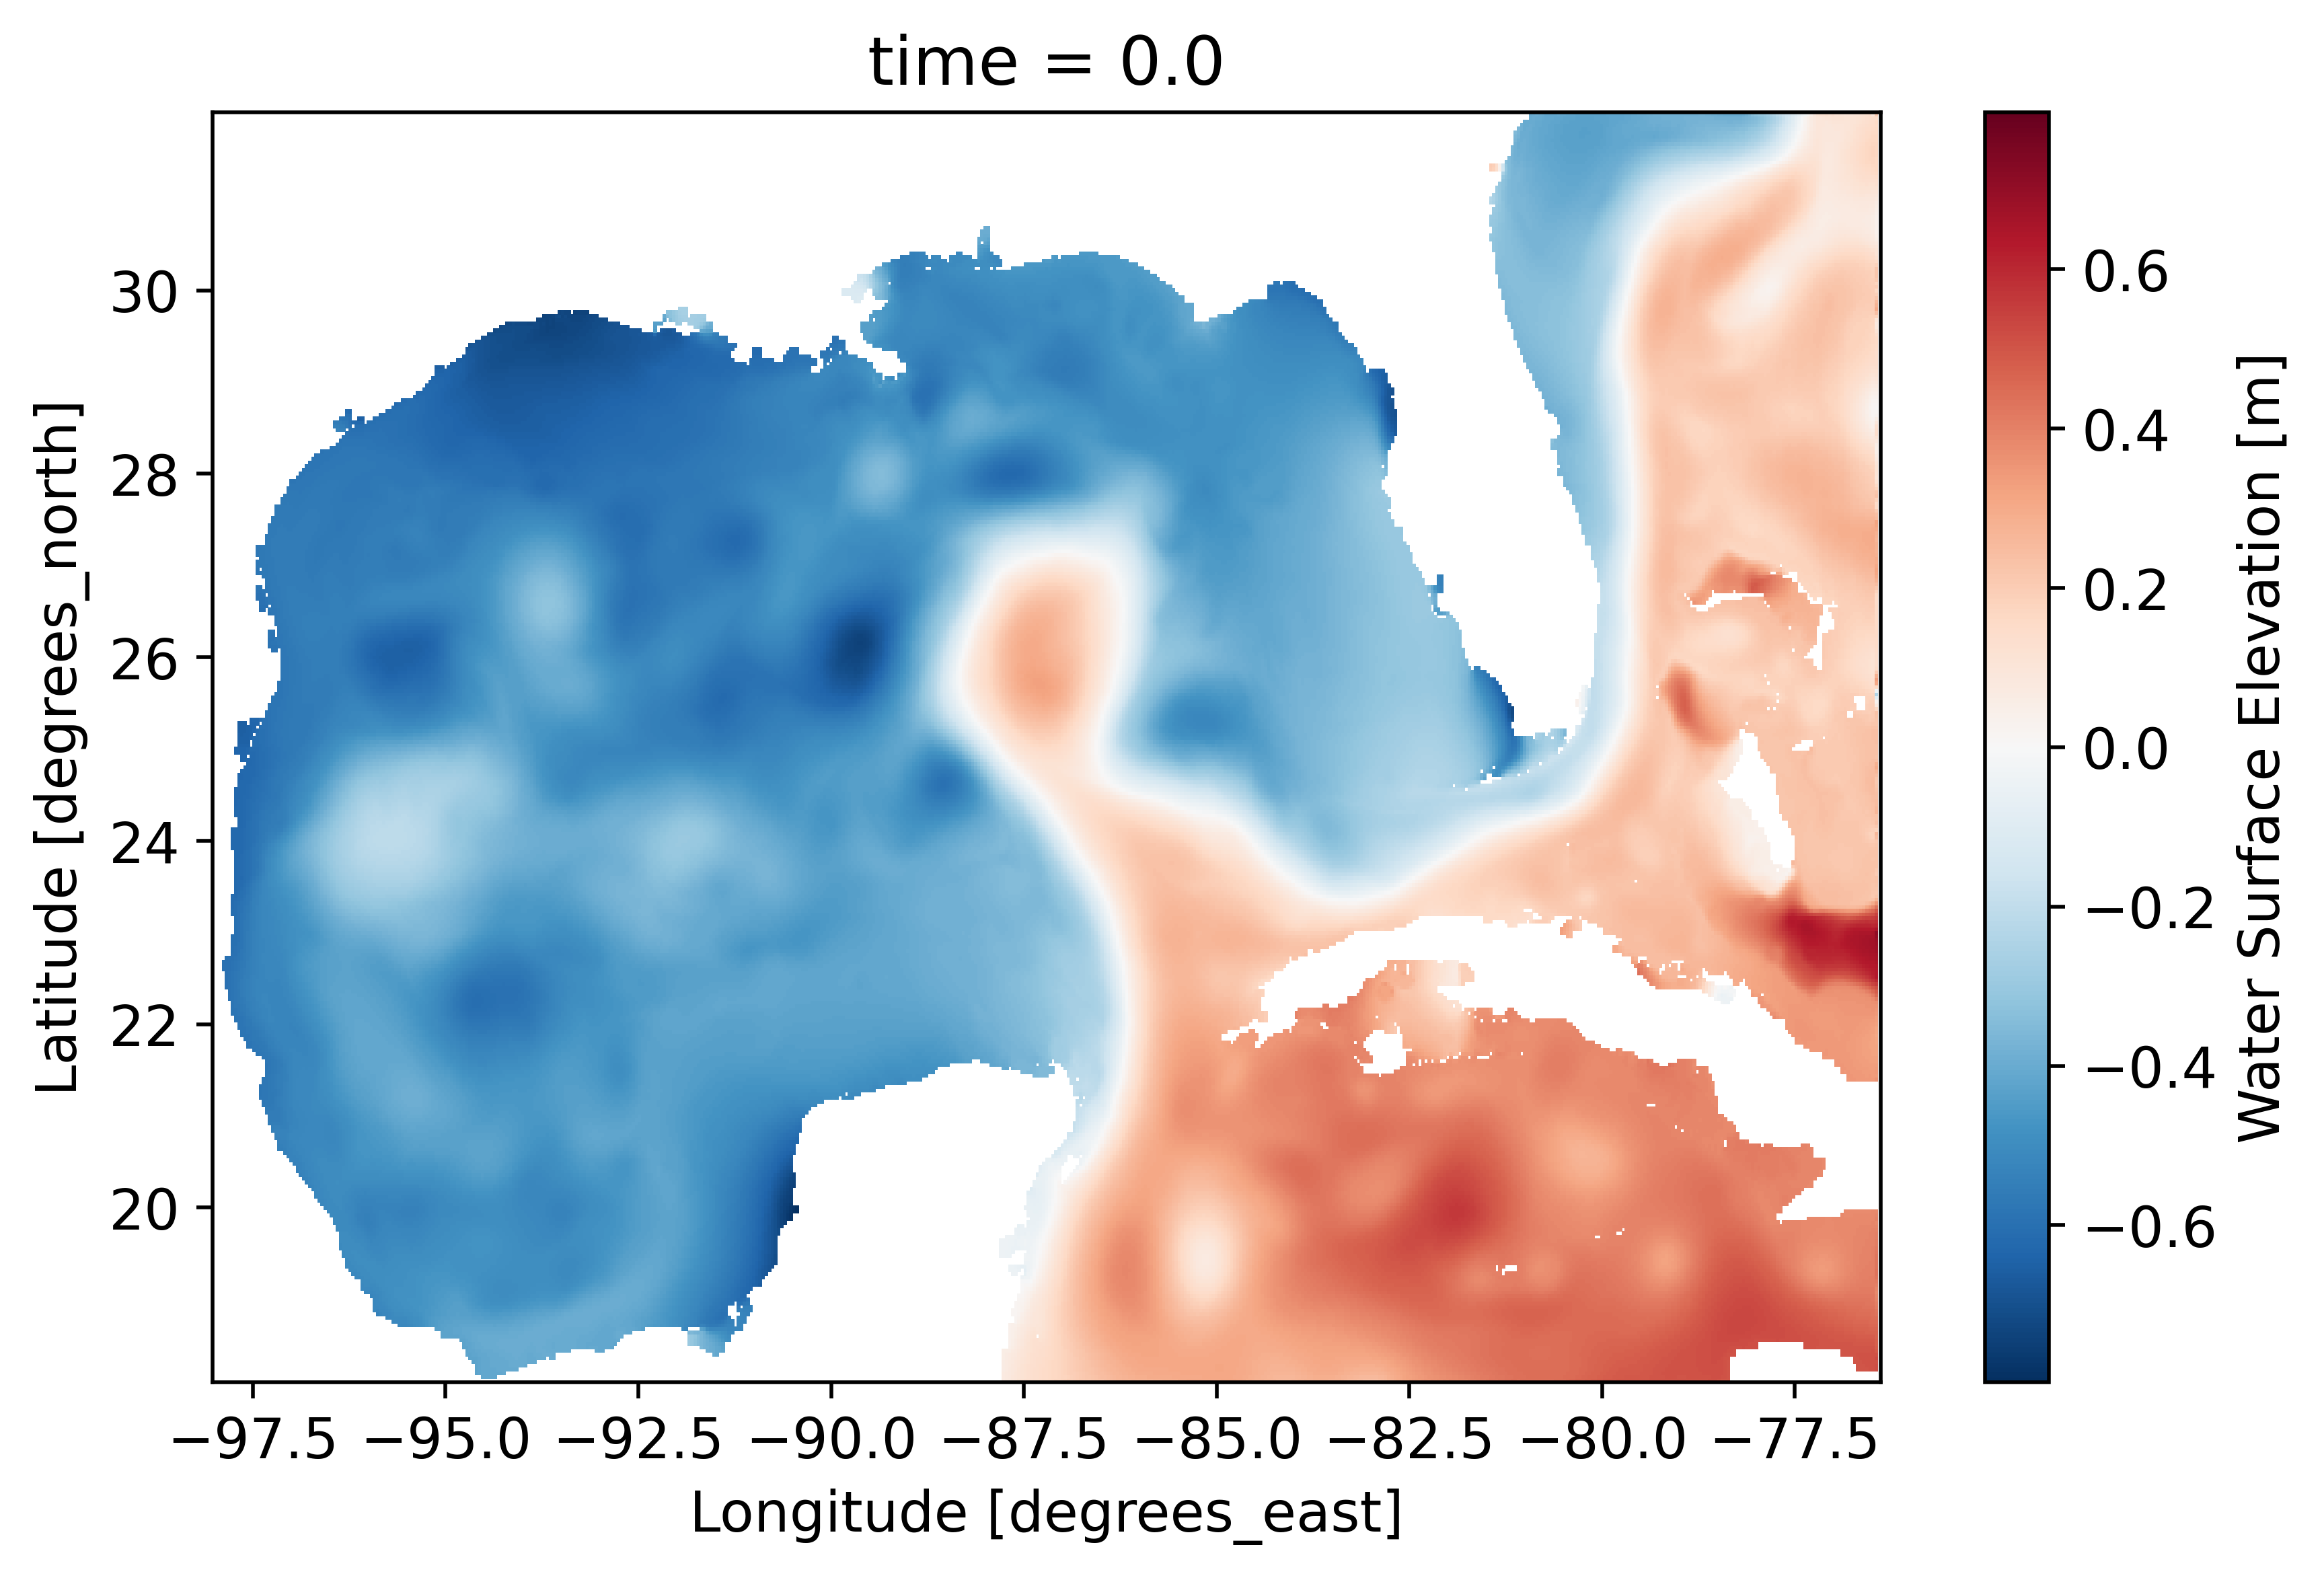

In [27]:
SSH_0.plot()

I can also save this subset of the data to a new netcdf file locally very easily. See http://xarray.pydata.org/en/stable/io.html for more details.

In [28]:
SSH_0.to_netcdf('SSH_0.nc') # the new netcdf file is saved in the local directory

I could also save more of the dataset if I wanted, for example the whole surface elevation timeseries. 

In [29]:
hycom_data.surf_el.to_netcdf('SSH_all.nc') # this is going to take a bit longer, more data

And then I load in the new netcdf file in the same way as I did the remote data, but using the local filepath

In [30]:
ssh_data = xr.open_dataset('SSH_all.nc', decode_times=False)

In [31]:
ssh_data

<xarray.Dataset>
Dimensions:  (lat: 346, lon: 541, time: 133)
Coordinates:
  * lat      (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon      (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
  * time     (time) float64 0.0 1.0 2.0 3.0 4.0 ... 129.0 130.0 131.0 132.0
Data variables:
    surf_el  (time, lat, lon) float32 ...

In [32]:
whos

Variable     Type         Data/Info
-----------------------------------
SSH_0        DataArray    <xarray.DataArray 'surf_e<...>   time_run time lat lon 
a            ndarray      2x2: 4 elems, type `int32`, 16 bytes
c            ndarray      4x4: 16 elems, type `float64`, 128 bytes
d            ndarray      6x5: 30 elems, type `float64`, 240 bytes
hycom_data   Dataset      <xarray.Dataset>\nDimensi<...>mrc:GOMu0.04_901m000_FMRC
link         str          http://tds.hycom.org/thre<...>_RUN_2021-02-22T12:00:00Z
mpl          module       <module 'matplotlib' from<...>matplotlib\\__init__.py'>
np           module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
plt          module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
ssh_data     Dataset      <xarray.Dataset>\nDimensi<...>me, lat, lon) float32 ...
xr           module       <module 'xarray' from 'C:<...>es\\xarray\\__init__.py'>


# Lab 7.2

**E.0** Finish Lab 7.1 if you haven't already.

**E.1** Complete Introduction to Data Visualization with Matplotlib Chapters 3-4

**E.2** Make notes for yourself on progamming tecniques and commands you learned in the lecture and datacamp chapter above, including examples, comments and explainitory text. You can do this here or in a separate notebook that you link to here. Basically, you are making a cheat sheet for yourself.

See also http://xarray.pydata.org/en/stable/plotting.html for more info about plotting right from xarray (optional).

rotation = to turn labels by a specified degree
ax.bar = for a bar graph
ax.hist = for a histogram
histtype = to specify the type of histogram, such as a step
yerr = to add error bars
.mean & .std = add mean and standard error to a plot
ax.errorbar = to plot a graph of points with error bars
ax.boxplot = to plot boxplots
ax.scatter = to make a scatterplot
c = color scheme where color intensity is associated with variable values
plt.style.use = used to specify a plot style such as grayscale
fig.savefig = to save files as a png, or other
dpi = to specify the resolution 
fig.set_size_inches = used to set the size of a figure

**E.3** Using the lecture as a guide, save the sea surface temperature for the last time in the dataset as a new, local netcdf file. You don't have to submit the file, just the code here.

In [33]:
hycom_data.water_temp

<xarray.DataArray 'water_temp' (time: 133, depth: 40, lat: 346, lon: 541)>
[995829520 values with dtype=float32]
Coordinates:
  * depth    (depth) float64 0.0 2.0 4.0 6.0 8.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * lat      (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon      (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
  * time     (time) float64 0.0 1.0 2.0 3.0 4.0 ... 129.0 130.0 131.0 132.0
Attributes:
    units:          degC
    long_name:      Water Temperature
    standard_name:  sea_water_temperature
    NAVO_code:      15
    comment:        in-situ temperature
    coordinates:    time_run time depth lat lon

In [34]:
water_temp = hycom_data.water_temp[-1]

In [35]:
water_temp

<xarray.DataArray 'water_temp' (depth: 40, lat: 346, lon: 541)>
[7487440 values with dtype=float32]
Coordinates:
  * depth    (depth) float64 0.0 2.0 4.0 6.0 8.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * lat      (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon      (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
    time     float64 132.0
Attributes:
    units:          degC
    long_name:      Water Temperature
    standard_name:  sea_water_temperature
    NAVO_code:      15
    comment:        in-situ temperature
    coordinates:    time_run time depth lat lon

In [ ]:
hycom_data.water_temp.to_netcdf('end_water_temp.nc')

**E.4** Plot the above (the last SST in the file).

In [36]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8.0, 5.0]
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['savefig.dpi'] = 500

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['lines.linewidth']= 2.0

(array([3.000000e+00, 7.000000e+00, 2.953300e+05, 3.018140e+05,
        1.788690e+05, 1.908690e+05, 2.691080e+05, 6.371280e+05,
        1.128695e+06, 7.706140e+05]),
 array([-5.233001 , -1.832801 ,  1.5673993,  4.9675994,  8.3678   ,
        11.768    , 15.1682005, 18.5684   , 21.968601 , 25.368801 ,
        28.769001 ], dtype=float32),
 <a list of 10 Patch objects>)

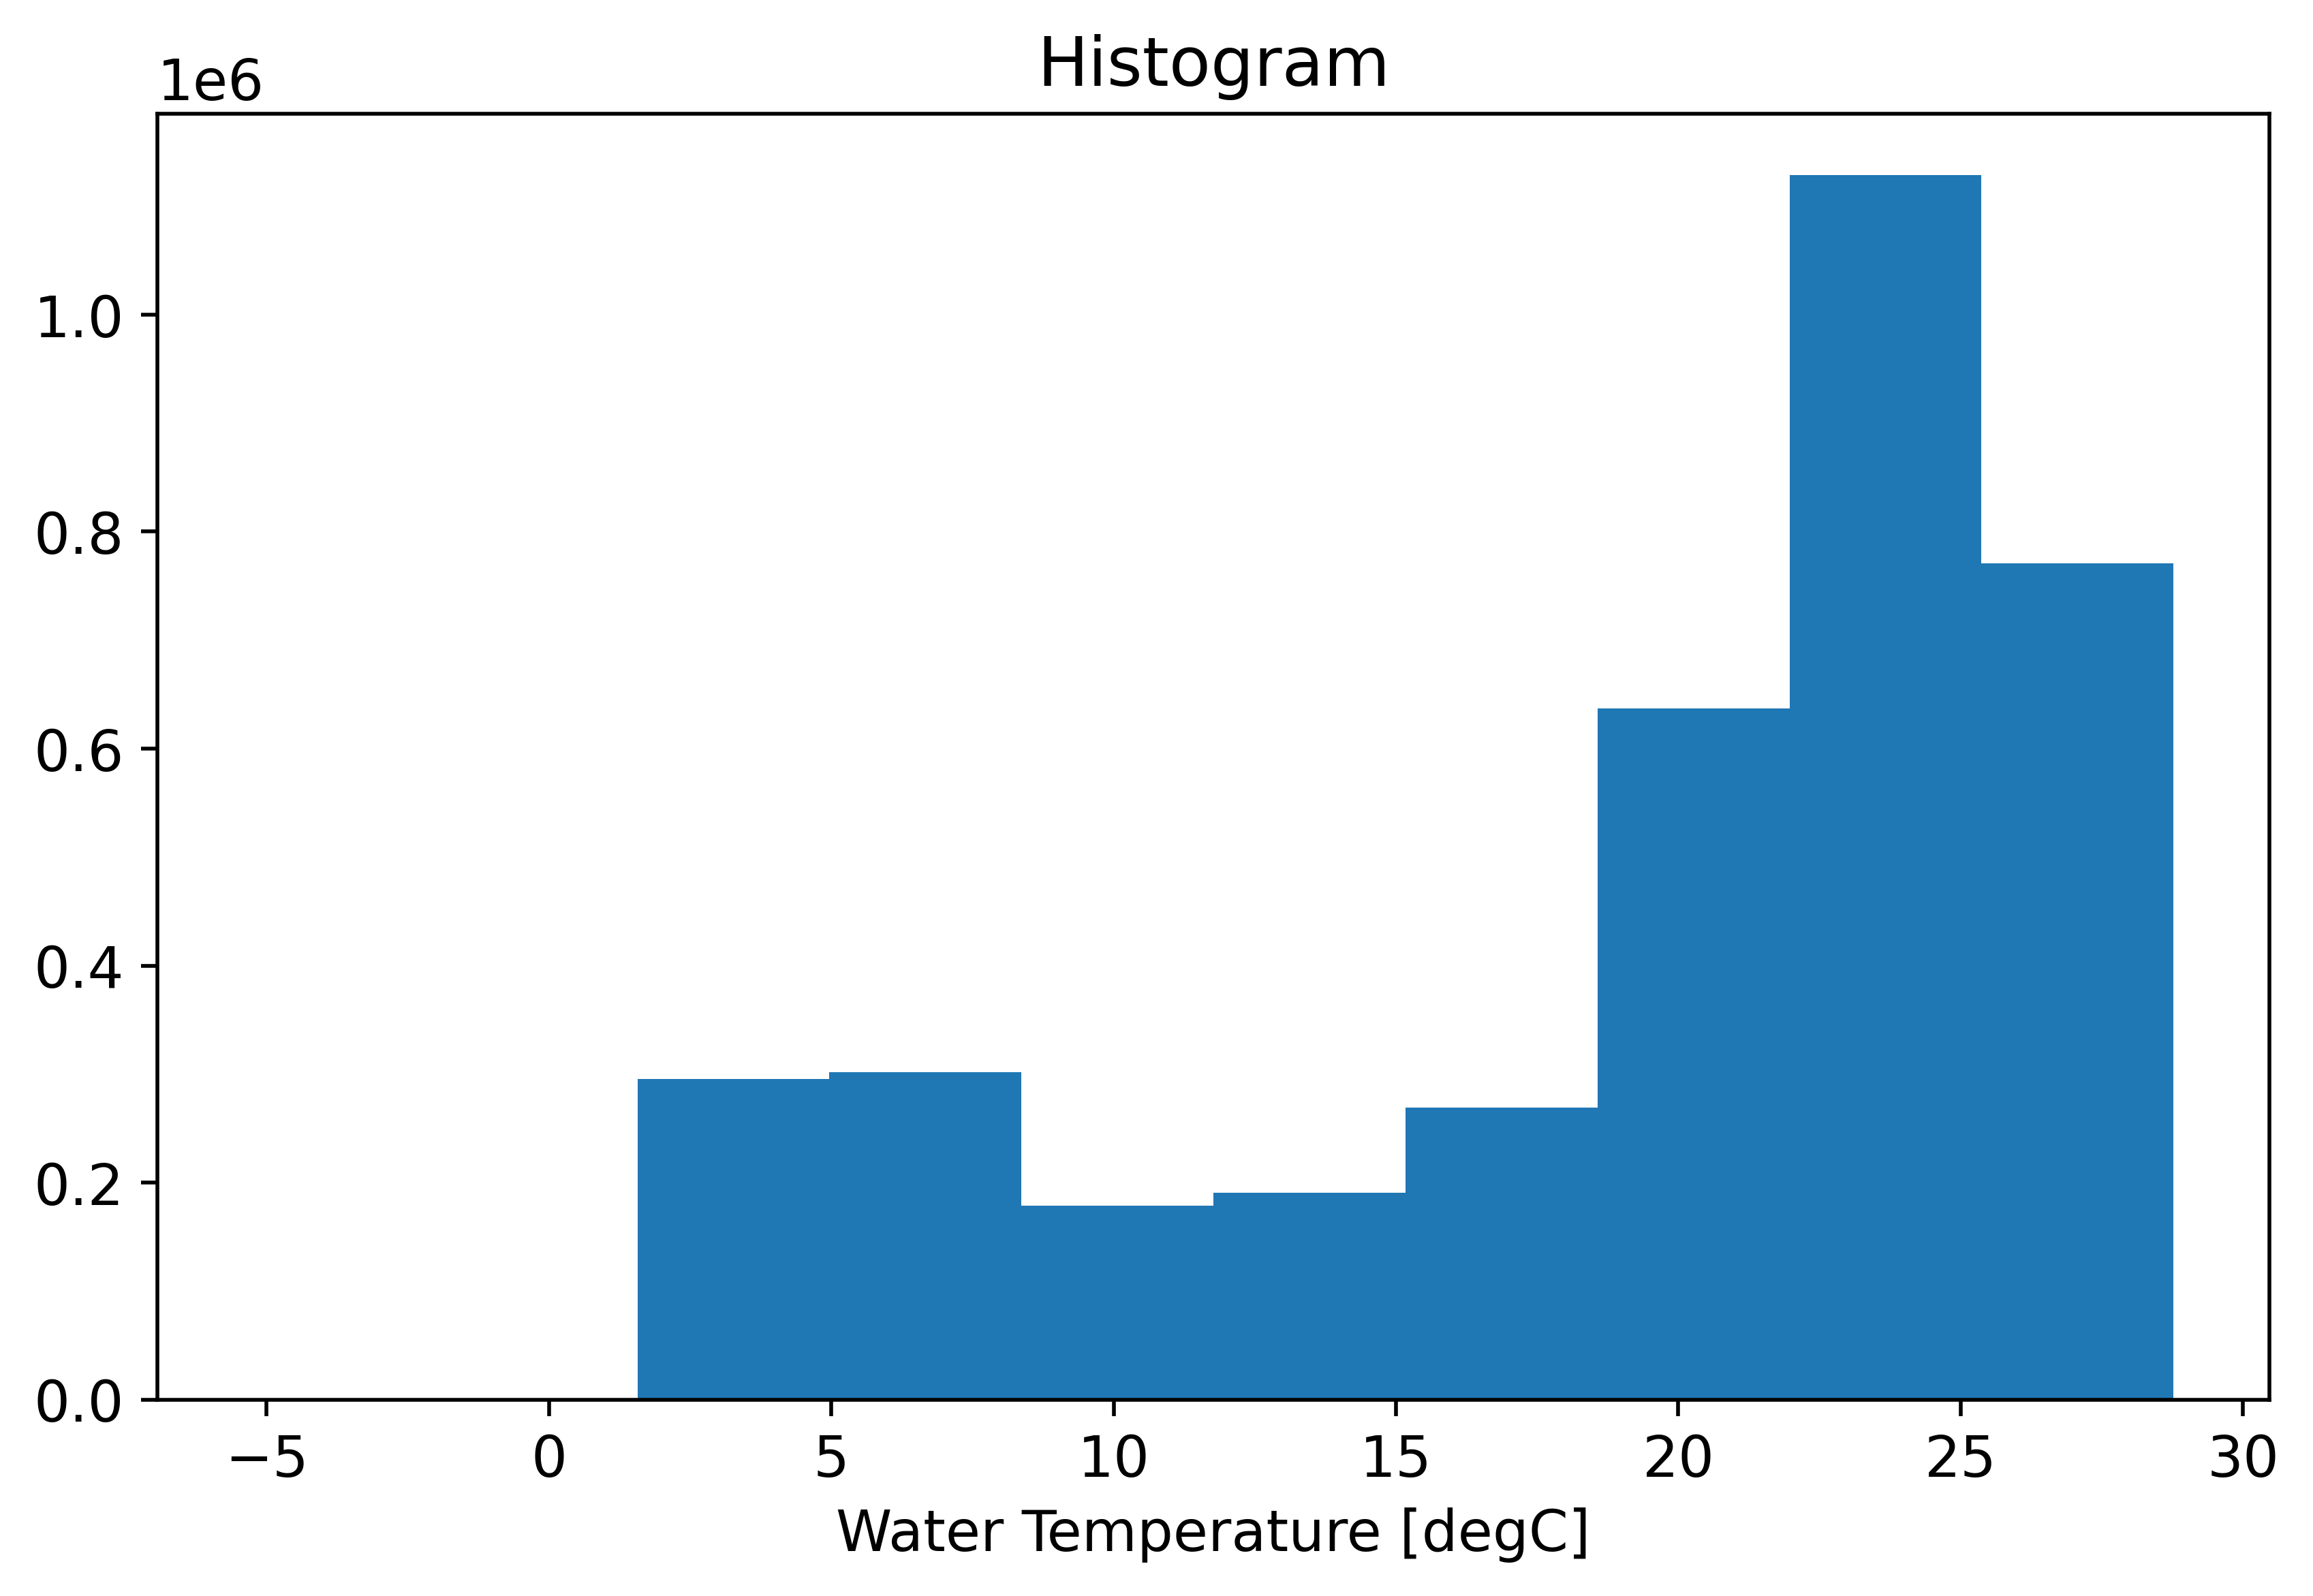

In [37]:
water_temp.plot()

### This week's project:

For Monday's class you will write two functions that work on your dataset (you can use the same dataset or a different one). The first function will do some sort of analysis, manipulation or calculation, the second will be a plotting function. The idea here is that if you had another datafile that was similar, you could use the function to do the operation again easily.

**E.5** Write one or more functions that plot your dataset. You will present these to the class on Monday.

In [22]:
anemones = pd.read_csv('Anemone3.csv')

In [23]:
anemones

,Video,Treatment,Salinity,Diameter Change,Area Change,Height Change,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,3882/691,32C,32,0.01,0.096,0.02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,32C,32,-0.14,-0.136,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mean,StDev,StEr
2,NaN,32C,32,-0.05,-0.413,-0.07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.022,0.105098593,0.026274648
3,NaN,32C,32,-0.04,-0.064,0.06,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,0.140109847,0.036176207
4,NaN,32C,32,0.14,-0.194,-0.15,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.105,0.150242229,0.040153925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,NaN,40E,40,-0.02,0.051,-0.19,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,716/4145,40E,40,-0.51,-0.622,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,40E,40,-0.21,-0.308,-0.68,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,NaN,40E,40,-0.29,-0.453,-0.52,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
anemonesdata = [anemones["Salinity"], anemones["Diameter Change"], anemones["Area Change"], anemones["Height Change"]]

In [34]:
anemonesdata_np = np.array(anemonesdata)

In [35]:
anemonesdata_np

array([[ 3.200e+01,  3.200e+01,  3.200e+01,  3.200e+01,  3.200e+01,
         3.200e+01,  3.200e+01,  3.200e+01,  3.200e+01,  2.500e+01,
         2.500e+01,  2.500e+01,  2.500e+01,  2.500e+01,  2.500e+01,
         2.500e+01,  4.000e+01,  4.000e+01,  4.000e+01,  4.000e+01,
         4.000e+01,  4.000e+01,  3.200e+01,  3.200e+01,  3.200e+01,
         3.200e+01,  3.200e+01,  3.200e+01,  2.500e+01,  2.500e+01,
         2.500e+01,  4.000e+01,  4.000e+01,  4.000e+01,  4.000e+01,
         3.200e+01,  3.200e+01,  3.200e+01,  3.200e+01,  3.200e+01,
         3.200e+01,  2.500e+01,  2.500e+01,  2.500e+01,  2.500e+01,
         2.500e+01,  2.500e+01,  2.500e+01,  4.000e+01,  4.000e+01,
         4.000e+01,  4.000e+01,  4.000e+01,  4.000e+01,  3.200e+01,
         3.200e+01,  3.200e+01,  3.200e+01,  2.500e+01,  2.500e+01,
         2.500e+01,  2.500e+01,  2.500e+01,  4.000e+01,  4.000e+01,
         4.000e+01,  4.000e+01,  4.000e+01,  4.000e+01,  4.000e+01],
       [ 1.000e-02, -1.400e-01, -5.000e-02, -4.

In [52]:
def plot(x, y, color, xlabel, ylabel):
    ax.scatter(x, y, color=color)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.tick_params('y', colors=color)

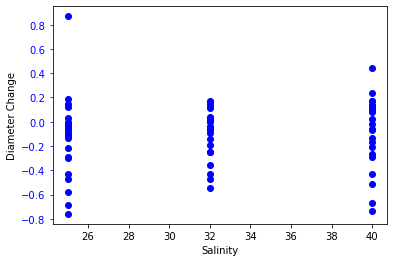

In [55]:
fig, ax = plt.subplots()
plot(anemonesdata_np[0,:], anemonesdata_np[1,:], 'blue', 'Salinity', 'Diameter Change')

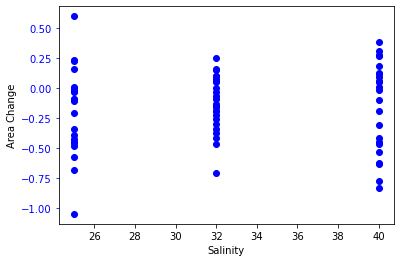

In [56]:
fig, ax = plt.subplots()
plot(anemonesdata_np[0,:], anemonesdata_np[2,:], 'blue', 'Salinity', 'Area Change')

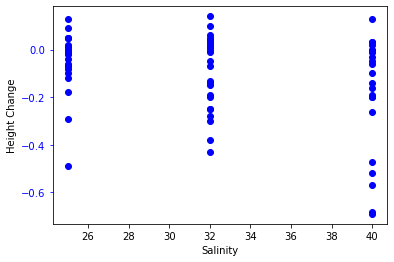

In [58]:
fig, ax = plt.subplots()
plot(anemonesdata_np[0,:], anemonesdata_np[3,:], 'blue', 'Salinity', 'Height Change')